In [1]:
import numpy as np
import json
import os
from collections import defaultdict
from tqdm.notebook import tqdm
import json
import re
import math
from functools import partial
from itertools import repeat
from multiprocessing import Pool
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from model import Transformer

/system/apps/userenv/hauzenbe/llm/lib/python3.11/site-packages/transformers/utils/hub.py:123: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [2]:
meta_model = Transformer.load_meta_llama2("../llama/llama-2-7b")

In [3]:
meta_model

Transformer(
  (embedding): Embedding(32000, 4096)
  (embedding_dropout): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0-31): 32 x TransformerBlock(
      (attn_norm): RMSNorm()
      (attn_layer): CausalSelfAttention(
        (attn_proj_q): Linear(in_features=4096, out_features=4096, bias=False)
        (attn_proj_k): Linear(in_features=4096, out_features=4096, bias=False)
        (attn_proj_v): Linear(in_features=4096, out_features=4096, bias=False)
        (attn_proj_out): Linear(in_features=4096, out_features=4096, bias=False)
        (attn_dropout_out): Dropout(p=0.0, inplace=False)
      )
      (ffn_norm): RMSNorm()
      (ffn_layer): FFN(
        (ffn_linear1): Linear(in_features=4096, out_features=11008, bias=False)
        (ffn_linear2): Linear(in_features=4096, out_features=11008, bias=False)
        (ffn_linear3): Linear(in_features=11008, out_features=4096, bias=False)
        (ffn_dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (output_norm): RMS

In [4]:
block_id = 3

In [7]:
Q = meta_model.blocks[block_id].attn_layer.attn_proj_q
K = meta_model.blocks[block_id].attn_layer.attn_proj_k
V = meta_model.blocks[block_id].attn_layer.attn_proj_v

In [6]:
QK = meta_model.blocks[block_id].attn_layer.attn_proj_k

Linear(in_features=4096, out_features=4096, bias=False)

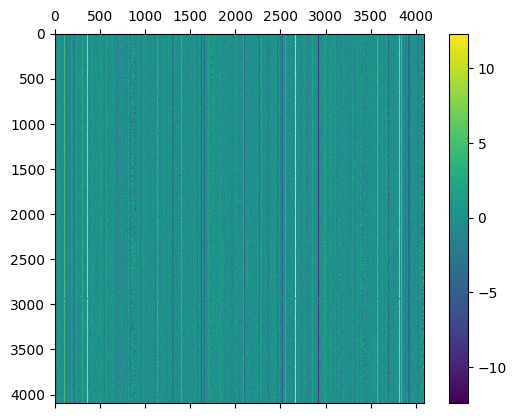

In [34]:
figure = plt.figure()
axes = figure.add_subplot(111)
 
# using the matshow() function
dim =  int(len(Q)**0.5)
caxes = axes.matshow(Q.reshape(dim, dim), interpolation ='nearest')
figure.colorbar(caxes)

In [4]:
with open('activations.pkl', 'rb') as f:
    activations = pickle.load(f)

In [ ]:
with open('activations.pkl', 'rb') as f:
    activations = pickle.load(f)

In [20]:
with open('activations_cell_values.pkl', 'rb') as f:
    activations_cell_values = pickle.load(f)

In [21]:
activations_cell_values = {k: np.array(v) for d in activations_cell_values for k, v in d.items()}

In [10]:
d = {}
for act in activations:
    for k in act[0].keys():
        ar = act[0][k]
        length = act[1][k]
        mean = ar[0] / length
        std = ar[1] / length - mean ** 2
        d[k] = (mean, std, ar[2], ar[3])

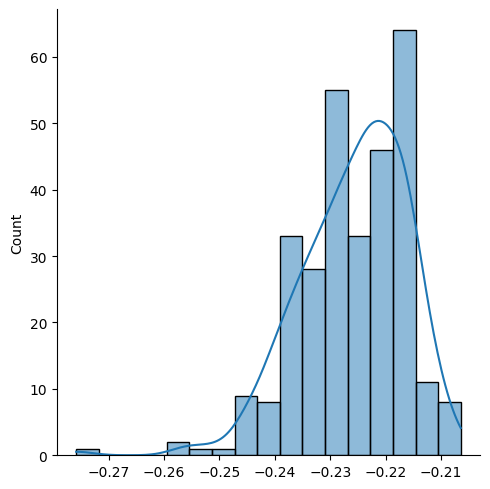

In [27]:
sns.displot(activations_cell_values['24_attn_proj_q'], kde=True)

In [6]:
m, s, max_values, min_values = d['inputs']
dim = int(m.shape[0] ** 0.5)
m = m.reshape(dim, dim)
s = s.reshape(dim, dim)
max_values = max_values.reshape(dim, dim)
min_values = min_values.reshape(dim, dim)

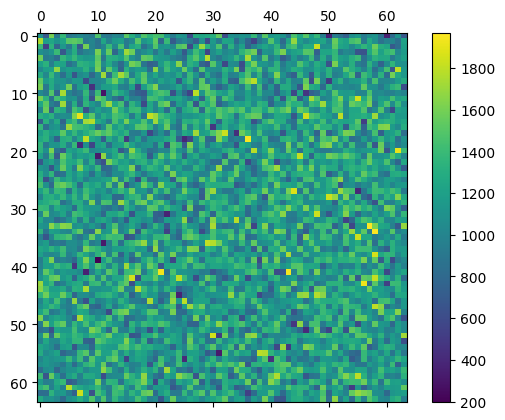

In [7]:
figure = plt.figure()
axes = figure.add_subplot(111)
 
# using the matshow() function 
caxes = axes.matshow(m, interpolation ='nearest')
figure.colorbar(caxes)

In [52]:
max_values.min()

-60.80399345760671

In [39]:
s

array([[9.71663402e-06, 5.03792556e-05, 6.44307651e-06, ...,
        5.37974680e-05, 6.88079804e-05, 1.54023912e-05],
       [2.71990173e-04, 2.22409102e-04, 2.68754460e-04, ...,
        2.73151014e-04, 3.23238725e-04, 2.28898726e-04],
       [8.78519243e-04, 7.60509068e-04, 7.26131129e-04, ...,
        7.90830513e-04, 7.43483413e-04, 6.47352832e-04],
       ...,
       [2.45758578e-03, 3.07675046e-03, 2.74046508e-03, ...,
        3.14361862e-03, 2.59824656e-03, 2.67855017e-03],
       [2.46760979e-03, 2.55908368e-03, 2.62803394e-03, ...,
        3.55424641e-03, 2.86214611e-03, 2.38212190e-03],
       [2.87723315e-03, 3.40614665e-03, 2.69099409e-03, ...,
        3.05345069e-03, 2.85547517e-03, 2.28637191e-03]])

In [16]:
d['other']

[('inputs', 'inputs_sample21.npy'),
 ('embedding', 'activations_sample227_embedding.npy'),
 ('inputs', 'inputs_sample284.npy'),
 ('inputs', 'inputs_sample9.npy'),
 ('embedding', 'activations_sample172_embedding.npy'),
 ('embedding', 'activations_sample98_embedding.npy'),
 ('embedding', 'activations_sample256_embedding.npy'),
 ('embedding', 'activations_sample221_embedding.npy'),
 ('inputs', 'inputs_sample236.npy'),
 ('outputs', 'outputs_sample197.npy'),
 ('inputs', 'inputs_sample225.npy'),
 ('embedding', 'activations_sample289_embedding.npy'),
 ('embedding', 'activations_sample240_embedding.npy'),
 ('inputs', 'inputs_sample179.npy'),
 ('outputs', 'outputs_sample120.npy'),
 ('outputs', 'outputs_sample29.npy'),
 ('inputs', 'inputs_sample115.npy'),
 ('outputs', 'outputs_sample141.npy'),
 ('inputs', 'inputs_sample269.npy'),
 ('inputs', 'inputs_sample174.npy'),
 ('outputs', 'outputs_sample101.npy'),
 ('outputs', 'outputs_sample146.npy'),
 ('outputs', 'outputs_sample122.npy'),
 ('outputs', '

In [5]:
import json
with open(os.path.join('activations', 'quantization_scalars.json'), 'r') as fp:
    quantization_scalars = json.load(fp)

In [6]:
def func(k):
    if 'inputs_nd' in k:
        return k.replace('inputs_nd', 'inputs')
    elif 'outputs_nd' in k:
        return k.replace('outputs_nd', 'outputs')
    else:
        return k

d = {func(k): v for k,v in quantization_scalars.items()}

In [8]:
with open(os.path.join('activations', 'quantization_scalars.json'), 'w') as fp:
    json.dump(d, fp)

In [12]:
[f for f in os.listdir('activations') if 'OLD' in f]

['OLD_quantization_scalars.json']

In [30]:
y = (nd * x).round().to(torch.int8)

In [31]:
y.numpy()

array([[  84,   98, -104,  -48],
       [ -51,   90,  -66,   13],
       [ -36,  -46,   66,  -29]], dtype=int8)

In [34]:
import json
d = {'a': 1.1, 'b': 2.23}
with open('test.json', 'w') as fp:
    json.dump(d, fp)

In [7]:
models = {
    'mha': model,
    'qq': model_qq,
    'gqa': model_gqa,
    'mqa': model_mqa
}
for name, m in models.items():
    n_params = sum([p.numel() for p in m.parameters()])
    print(f'{name} has {n_params} parameters, {n_params / sum([p.numel() for p in model.parameters()]):.4f} of multi head attention')

mha has 6738415616 parameters, 1.0000 of multi head attention
qq has 5664935936 parameters, 0.8407 of multi head attention
gqa has 5798891520 parameters, 0.8606 of multi head attention
mqa has 5698228224 parameters, 0.8456 of multi head attention


In [8]:
model

Transformer(
  (embedding): Embedding(32000, 4096)
  (embedding_dropout): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0-31): 32 x TransformerBlock(
      (attn_norm): RMSNorm()
      (attn_layer): CausalSelfAttention(
        (attn_proj_q): Linear(in_features=4096, out_features=4096, bias=False)
        (attn_proj_k): Linear(in_features=4096, out_features=4096, bias=False)
        (attn_proj_v): Linear(in_features=4096, out_features=4096, bias=False)
        (attn_proj_out): Linear(in_features=4096, out_features=4096, bias=False)
        (attn_dropout_out): Dropout(p=0.0, inplace=False)
      )
      (ffn_norm): RMSNorm()
      (ffn_layer): FFN(
        (ffn_linear1): Linear(in_features=4096, out_features=11008, bias=False)
        (ffn_linear2): Linear(in_features=4096, out_features=11008, bias=False)
        (ffn_linear3): Linear(in_features=11008, out_features=4096, bias=False)
        (ffn_dropout): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (output_norm): RMS

In [15]:
sum([p.numel() for p in model.blocks[1].attn_layer.parameters()])

67108864

In [16]:
sum([p.numel() for p in model.blocks[1].attn_layer.parameters()]) / sum([p.numel() for p in model.blocks[1].ffn_layer.parameters()])

0.49612403100775193

In [17]:
meta_model = Transformer.load_meta_llama2("../llama/llama-2-7b")

In [18]:
with torch.no_grad():
    ar = torch.cat([p.view(-1) for p in meta_model.parameters()])

In [19]:
ar = ar.numpy()

In [20]:
ar_hist = np.histogram(ar, bins=50, density=True)

In [21]:
a, b = ar_hist

<BarContainer object of 50 artists>

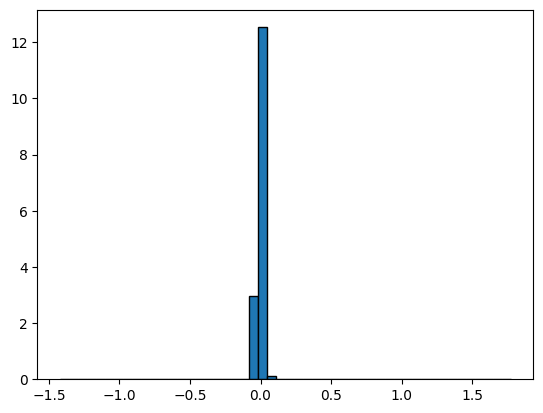

In [22]:
plt.bar(b[:-1], a, width=b[1]-b[0], align='edge', edgecolor='black')

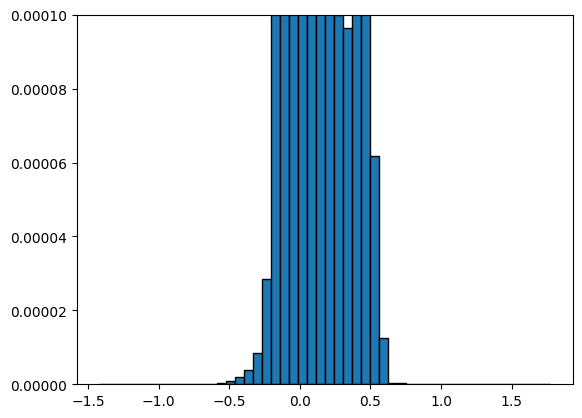

In [25]:
plt.bar(b[:-1], a, width=b[1]-b[0], align='edge', edgecolor='black')
plt.ylim(0, 0.0001)
plt.show()

In [26]:
ar.max()

1.7734375

In [48]:
x = meta_model.blocks[10].attn_layer.attn_proj_q.weight.data

In [51]:
x.max()

tensor(0.4629)

In [8]:
tokenizer = Tokenizer()

In [18]:
prompt = "Austria emerged from the remnants of the Eastern and Hungarian March at the end of the first millennium. Originally a margraviate of Bavaria, it developed into a duchy of the Holy Roman Empire in 1156 and was later made an archduchy in 1453. In the 16th"

In [19]:
x = tokenizer.encode(prompt)

In [20]:
x = torch.tensor(x).unsqueeze(0)

In [29]:
y = model.generate(x, 30, temperature=0.8, top_k=10)

In [30]:
y

tensor([[17362, 11176,  3192,   515,   278,  1083, 29876,  1934,   310,   278,
         16162,   322, 14198, 13956,  4779,   472,   278,  1095,   310,   278,
           937,  3533,   264,  1240,   398, 29889, 22118,   635,   263, 15276,
           336,  1403,   403,   310, 24311,  4568, 29892,   372,  8906,   964,
           263,   868, 23766,   310,   278, 17733,  5917, 13378,   297, 29871,
         29896, 29896, 29945, 29953,   322,   471,  2678,  1754,   385,  3190,
           700, 23766,   297, 29871, 29896, 29946, 29945, 29941, 29889,   512,
           278, 29871, 29896, 29953,   386,  6462, 29892,   372,  3897,   263,
         23925,   297,   278, 16162, 25620, 10800,   273, 29892,   541,   372,
           471,   451,  2745,   278,  1095,   310,  2787,  3362,  1944,   393,
           372,  3897,   278,  7483,   310]])

In [53]:
from transformers import AutoModel

m = AutoModel.from_pretrained('facebook/opt-1.3b')

config.json: 100%|██████████| 653/653 [00:00<00:00, 1.55MB/s]
pytorch_model.bin: 100%|██████████| 2.63G/2.63G [00:30<00:00, 87.3MB/s]


In [54]:
with torch.no_grad():
    ar = torch.cat([p.view(-1) for p in m.parameters()])

In [57]:
ar

tensor([ 0.0175, -0.0312, -0.0176,  ...,  0.0743,  0.1257,  0.1272])

In [46]:
y = l(x)
y.sum().backward()

In [47]:
l.W.grad

tensor([[-0.1165,  0.2191,  0.1771,  0.0720, -0.1023,  0.2176,  0.0064,  0.1303,
          0.2672,  0.0863],
        [ 0.0280, -0.0527, -0.0426, -0.0173,  0.0246, -0.0523, -0.0015, -0.0313,
         -0.0643, -0.0207],
        [-0.4141,  0.7790,  0.6298,  0.2560, -0.3637,  0.7736,  0.0228,  0.4632,
          0.9500,  0.3067],
        [ 0.2222, -0.4180, -0.3379, -0.1374,  0.1951, -0.4151, -0.0123, -0.2485,
         -0.5098, -0.1645],
        [ 0.2398, -0.4511, -0.3647, -0.1483,  0.2106, -0.4480, -0.0132, -0.2683,
         -0.5502, -0.1776],
        [-0.0207,  0.0388,  0.0314,  0.0128, -0.0181,  0.0386,  0.0011,  0.0231,
          0.0474,  0.0153],
        [ 0.1385, -0.2606, -0.2107, -0.0856,  0.1217, -0.2588, -0.0076, -0.1550,
         -0.3178, -0.1026],
        [-0.4518,  0.8498,  0.6870,  0.2793, -0.3967,  0.8439,  0.0249,  0.5053,
          1.0364,  0.3345],
        [ 0.1189, -0.2236, -0.1808, -0.0735,  0.1044, -0.2221, -0.0066, -0.1330,
         -0.2727, -0.0880],
        [-0.3578,  

In [92]:
x, y = next(iter(ds_train))

In [93]:
tokenizer.decode(x.tolist())

'�q��\x02�\x15\x02&i �\x03a!!\x02�B(h\x06Ip\x04�q�\x1a-\x13�3M\x00&�q�q�q�q�q�q\x13�A�\x133\x0f\x12RU"�S�\x01\x08�q�q�q�qq\x19\x01�]&\x13o\t�q}\x01;\x02�q[\x02pa�\\\x02\x027\x02�\x1a�\x0f\x12RU"�S-7\x1b[\x02pa\r"�Sh\x13�\x133[\x02pa��J2�H�q?��\x0bO�\x19�\x01Y�\x03��\x0b�G��\x00\x0f\x12RU"�S�qy\x0b� \x13o\x03?�\n\x1b\x00\x031\x01�q\n ⁇ \n ⁇ \x1a\x00\x13�SZ2�q�\x01�\x0f�\x1a&mOR\x05N�\x19-7\x1b�\x0eY\x02�q}\x01;\x02�q\x04R�\x05�S�\x1a�q�o}\x0b�-7\x1bo}\x0b�\x04\x04R�%�q\x04�J2k\x0c�qcJ�q\x14\x03Y\x04�q��\x01�\x0f�l�\x02q\x05�\\g�q�\x0b�q-7\x1b���q\n ⁇ \n ⁇ �&�\x0f\x0b�\x0c\x15\x02-\x12\nIQ?�\x00\x07\x01X\x04 \x00\x00\x037\x02&\x04^\x04�\x08��\x134\x04�q}\x07_\x01l\x15\x02�~�jmp&\x043\x1c�\x08Y?�q!\x02�\x0f\x12RU"�S&\x04\x14\x03Y?�q\n ⁇ \n ⁇ \x1a\x00�"\n ⁇ \n ⁇ �q�\x14"�SO~\x01\r@\r3\x06\x00�9\x15\x02�"�q��s�\x05\x1c\x1b�\x0e\x08?\x01\x08\x1f�q�D\x1a�O?�E6\x04q\x00�\x03�\x01�\x0f�qfP�\x05�SO�\x05&�\x01\x18�q�}\x0b?�\x00n\x1a�:\x1a�O�q�!\x19"�SO�\x05&3\x16�L�q�\'��q?�\x18&\x14\x03Z\x01�\x0

In [98]:
ar = np.memmap('data/train.bin', dtype=np.uint16, mode='r')

In [99]:
tokenizer.decode(ar[:4].tolist())

'The American Library Association'

In [224]:
res = 0
for i in range(n):
    for j in range(n):
        res += x[i]*x[j]*z[i]*z[j]
res

0.09790697272742185

In [222]:
x

array([-0.6427633 ,  0.64751949])

In [20]:
math.exp(1)/sum([math.exp(1), math.exp(6), math.exp(3)])

0.006377460922442297

In [304]:
L = torch.nn.Linear(124, 16)
lmbda = 1

In [305]:
x = torch.randn(1, 124)

In [306]:
U = dist.Uniform(0, 1)
G = dist.Gumbel(0, 1)
gumbel_transform = lambda u: - torch.log( - torch.log(u))

In [307]:
g = G.sample(sample_shape=(16,))


In [308]:
g.shape

torch.Size([16])

In [309]:
a = L(x)

In [310]:
a

tensor([[ 0.3046, -0.6786, -0.5013,  1.1889, -1.2514, -0.2266,  0.8777, -0.7108,
         -1.0188,  0.3205,  0.9372,  0.1740, -0.1202,  0.6434, -0.4213,  1.0999]],
       grad_fn=<AddmmBackward0>)

In [311]:
y = F.softmax((a.requires_grad_(True) + g.unsqueeze(0)) / lmbda, dim=-1)

In [312]:
y

tensor([[3.3541e-02, 4.0573e-04, 7.4320e-04, 2.1877e-02, 5.7568e-02, 3.7437e-02,
         1.9383e-03, 1.4514e-02, 3.1444e-04, 1.9065e-03, 4.6129e-03, 2.3255e-03,
         3.5822e-03, 8.1414e-01, 1.1174e-03, 3.9777e-03]],
       grad_fn=<SoftmaxBackward0>)

In [313]:
y.sum().backward()

In [314]:
L.weight.grad.sum()

tensor(-1.2199e-06)

<BarContainer object of 16 artists>

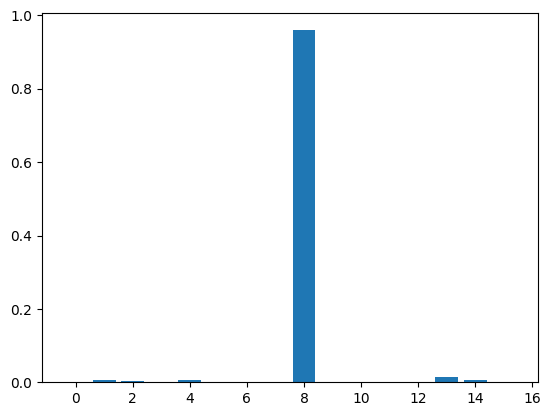

In [26]:
plt.bar(x = np.arange(y.numel()), height = y.squeeze().detach().numpy())

In [316]:
y.max()

tensor(0.8141, grad_fn=<MaxBackward1>)

In [25]:
y.numel()

16

In [38]:
import numpy as np
import pickle

In [32]:
d = {'a': np.random.randn(2,2), 'b': np.random.randn(3,3)}

In [34]:
np.save('test.npy', d)

In [35]:
x = np.load('test.npy', allow_pickle=True)

In [39]:
with open('test.npy', 'wb') as f:
    pickle.dump(d, f)

In [40]:
with open('test.npy', 'rb') as f:
    d = pickle.load(f)

In [41]:
d

{'a': array([[ 0.62360775,  0.6940674 ],
        [-0.68902921, -0.38595602]]),
 'b': array([[ 0.03127388,  0.55495369, -0.16248388],
        [ 0.40091705,  0.90416002,  0.21716094],
        [-0.31784587,  0.79398917,  0.46987025]])}